In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat

data= "Data/24-08-30-19-15.txt"
data = pd.read_csv(data, sep=" ")
print(data)

        40000  1725063341
0       40000  1725063342
1       40007  1725063343
2       40006  1725063344
3       40010  1725063345
4       40009  1725063346
...       ...         ...
248025  40002  1725304274
248026  40009  1725304275
248027  40000  1725304276
248028  40000  1725304277
248029  40000  1725304278

[248030 rows x 2 columns]


In [6]:
Decay_times=data.iloc[:,0]

In [7]:
Decay_times

0         40000
1         40007
2         40006
3         40010
4         40009
          ...  
248025    40002
248026    40009
248027    40000
248028    40000
248029    40000
Name: 40000, Length: 248030, dtype: int64

In [8]:
Decay_times=np.sort(Decay_times)


In [9]:
Decay_times

array([   40,    40,    40, ..., 40029, 40050, 40139], dtype=int64)

In [10]:
filter_i=0
for i in range(len(Decay_times)):
    
    if  Decay_times[i]>= 40000:
        
        filter_i=i
        
        break
        

print(filter_i)

7171


In [11]:
Decay_Filtered=Decay_times[0:filter_i-1] /1000

print(Decay_Filtered)

[ 0.04  0.04  0.04 ... 19.76 19.8  19.94]


In [12]:
N_muons=(len(Decay_Filtered))
N_muons

7170

In [32]:
hist, bin_edges = np.histogram(Decay_Filtered,bins=25)

In [33]:
hist,bin_edges

(array([2274, 1483, 1049,  706,  507,  329,  215,  167,  103,   77,   52,
          31,   33,   27,   23,   15,   18,   13,    6,    7,    4,    8,
           6,    8,    9], dtype=int64),
 array([ 0.04 ,  0.836,  1.632,  2.428,  3.224,  4.02 ,  4.816,  5.612,
         6.408,  7.204,  8.   ,  8.796,  9.592, 10.388, 11.184, 11.98 ,
        12.776, 13.572, 14.368, 15.164, 15.96 , 16.756, 17.552, 18.348,
        19.144, 19.94 ]))

In [34]:
Decay_Filter_pd=pd.DataFrame(Decay_Filtered)

2.3289718270571833

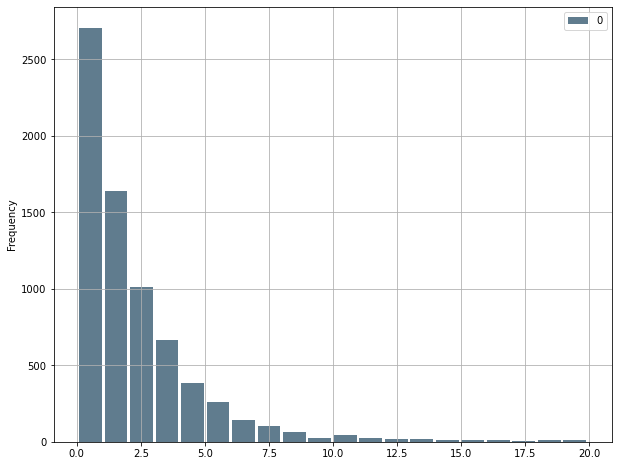

In [35]:

Decay_Filter_pd.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(10,8),label="Conteos de decaimientos de muones")
bin_pos=[]
for i in range(1,len(bin_edges)):
       bin_pos.append((bin_edges[i]+bin_edges[i-1])/2) 
        
mean=np.sum(hist*bin_pos)/N_muons
mean



In [36]:
N_t=N_muons-np.cumsum(hist)
N_t=np.append(N_muons,N_t)
N_t
bin_edges[0]=0



C:\Users\THINKB~1\AppData\Local\Temp/ipykernel_17676/2632868782.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*X) + D


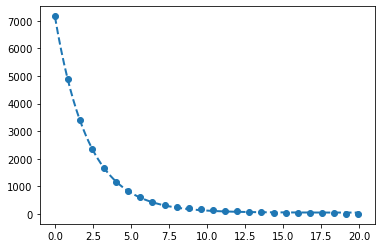

In [51]:
def fit_exp(X,a,b,D):
    return a*np.exp(-b*X) + D


popt, pcov = curve_fit(fit_exp,bin_edges,N_t,maxfev=4000)
x=np.linspace(0,20,100)
plt.plot(x, fit_exp(x,*popt), linewidth=2, label="Ajuste de la forma $N(t)=Ae^{t/b}$",ls="--")
plt.scatter(bin_edges,N_t)

In [52]:
popt
tau=1/popt[1]

tau

2.180125844472653

In [39]:
np.sqrt(pcov[1,1])

0.0028740781876128237

In [40]:
t_mean= ufloat(tau,np.sqrt(pcov[1,1]))
print(t_mean)

2.1801+/-0.0029
